In [44]:
for i in range(20):
    print(i,"=>",0.75**(i))

0 => 1.0
1 => 0.75
2 => 0.5625
3 => 0.421875
4 => 0.31640625
5 => 0.2373046875
6 => 0.177978515625
7 => 0.13348388671875
8 => 0.1001129150390625
9 => 0.07508468627929688
10 => 0.056313514709472656
11 => 0.04223513603210449
12 => 0.03167635202407837
13 => 0.023757264018058777
14 => 0.017817948013544083
15 => 0.013363461010158062
16 => 0.010022595757618546
17 => 0.00751694681821391
18 => 0.005637710113660432
19 => 0.004228282585245324


In [4]:
import torch
from torch import nn

a = torch.rand(16,4)
b = torch.rand(16,4)
criterion = nn.MSELoss()
criterion_nored = nn.MSELoss(reduction='none')
print(criterion(a,b))
print(criterion_nored(a,b).mean(axis=0).sum())

tensor(0.1429)
tensor(0.5716)


In [44]:
import torch
from pytorch_tcn import TCN

model = TCN(
    num_inputs = 512,
    num_channels = [1024,2048,1024,512,256],
    kernel_size=2,
    dilation_reset = 16,
    input_shape='NLC',
)

# batch=10, ts=16, features=4
b = torch.ones(size=(10, 32, 512))
print(b.shape)
res = model(b)
print(res.shape)


other = res[:, :-1, :]
print(other.shape)
last_ts = res[:, -1 , :]
print(last_ts.shape)


torch.Size([10, 32, 512])
torch.Size([10, 32, 256])
torch.Size([32, 512])
torch.Size([32, 512])
torch.Size([32, 512])
torch.Size([32, 512])
torch.Size([32, 512])
torch.Size([32, 512])
torch.Size([32, 512])
torch.Size([32, 512])
torch.Size([32, 512])
torch.Size([32, 512])
torch.Size([10, 31, 256])
torch.Size([10, 256])


In [40]:
a = torch.tensor([1,2,3],dtype=float, requires_grad=True)
b = torch.tensor([3,4,5],dtype=float, requires_grad=True)
c = torch.tensor([6,7,8],dtype=float, requires_grad=True)

x = torch.matmul(a.reshape(-1,1), b.reshape(1,-1))
y = torch.matmul(b.reshape(-1,1), c.reshape(1,-1))


z = torch.stack([x,y], dim=0)
print(z)

print(torch.autograd.grad(z.mean(), (x,y)))

tensor([[[ 3.,  4.,  5.],
         [ 6.,  8., 10.],
         [ 9., 12., 15.]],

        [[18., 21., 24.],
         [24., 28., 32.],
         [30., 35., 40.]]], dtype=torch.float64, grad_fn=<StackBackward0>)
(tensor([[0.0556, 0.0556, 0.0556],
        [0.0556, 0.0556, 0.0556],
        [0.0556, 0.0556, 0.0556]], dtype=torch.float64), tensor([[0.0556, 0.0556, 0.0556],
        [0.0556, 0.0556, 0.0556],
        [0.0556, 0.0556, 0.0556]], dtype=torch.float64))


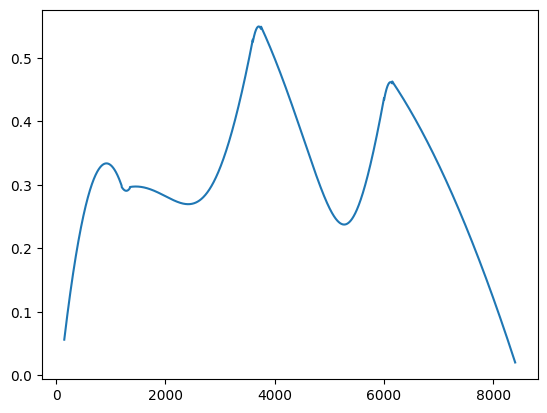

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from math import atan2

df = pd.read_csv("traj.csv")[['x','y','z','yaw']]

s = 150
dx = df['x']-df['x'].shift(s)
dy = df['y']-df['y'].shift(s)
dv = np.array( [ [dxi,dyi] for dxi, dyi in zip(dx,dy) ] )
plt.plot(np.linalg.norm(dv,axis=1))

dv_angle = dv - np.roll(dv, 1)
dv_angle
# dv_angle = [atan2(x[1], x[0]) for x in dv_angle]
# plt.plot(dv_angle)
dyaw = df['yaw'] - df['yaw'].shift(s)


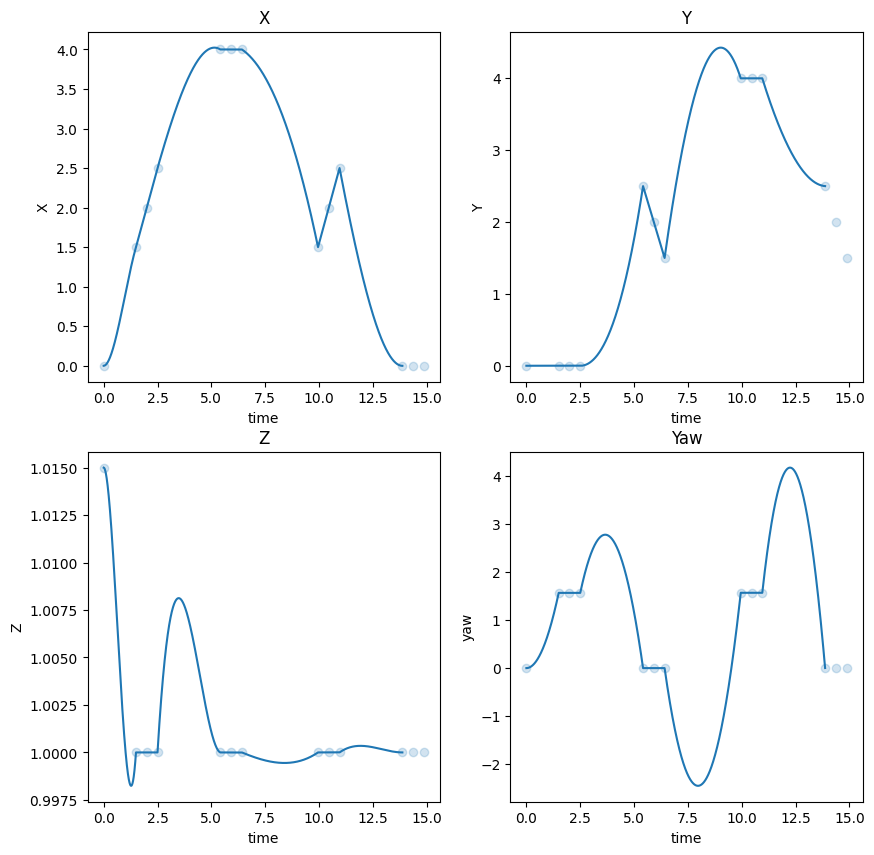

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10,10)
fig, ax = plt.subplots(6,2)


traj = pd.read_csv('./gatefollowing/traj.csv')
traj['vel_x'] = traj['x'] - traj['x'].shift(1)
traj['vel_y'] = traj['y'] - traj['y'].shift(1)
traj['vel_z'] = traj['z'] - traj['z'].shift(1)
traj['vel_yaw'] = traj['yaw'] - traj['yaw'].shift(1)

wp = pd.read_csv('./gatefollowing/wp.csv')

ax[0,0].set_title('X')
ax[0,0].set_ylabel('X')
ax[0,0].set_xlabel('time')
ax[0,0].plot(traj['time'], traj['x'])
ax[0,0].scatter(wp['time'], wp['x'], alpha=0.2)

ax[0,1].set_title('Y')
ax[0,1].set_ylabel('Y')
ax[0,1].set_xlabel('time')
ax[0,1].plot(traj['time'], traj['y'])
ax[0,1].scatter(wp['time'], wp['y'], alpha=0.2)

ax[1,0].set_title('Z')
ax[1,0].set_ylabel('Z')
ax[1,0].set_xlabel('time')
ax[1,0].plot(traj['time'], traj['z'])
ax[1,0].scatter(wp['time'], wp['z'], alpha=0.2)

ax[1,1].set_title('Yaw')
ax[1,1].set_ylabel('yaw')
ax[1,1].set_xlabel('time')
ax[1,1].plot(traj['time'], traj['yaw'])
ax[1,1].scatter(wp['time'], wp['yaw'], alpha=0.2)


ax[2+0,0].set_title('Vel X')
ax[2+0,0].set_ylabel('Vel X')
ax[2+0,0].set_xlabel('time')
ax[2+0,0].plot(traj['time'], traj['vel_x'])
ax[2+0,0].scatter(wp['time'], wp['x'], alpha=0.2)

ax[2+0,1].set_title('Y')
ax[2+0,1].set_ylabel('Y')
ax[2+0,1].set_xlabel('time')
ax[2+0,1].plot(traj['time'], traj['y'])
ax[2+0,1].scatter(wp['time'], wp['y'], alpha=0.2)

ax[2+1,0].set_title('Z')
ax[2+1,0].set_ylabel('Z')
ax[2+1,0].set_xlabel('time')
ax[2+1,0].plot(traj['time'], traj['z'])
ax[2+1,0].scatter(wp['time'], wp['z'], alpha=0.2)

ax[2+1,1].set_title('Yaw')
ax[2+1,1].set_ylabel('yaw')
ax[2+1,1].set_xlabel('time')
ax[2+1,1].plot(traj['time'], traj['yaw'])
ax[2+1,1].scatter(wp['time'], wp['yaw'], alpha=0.2)

plt.show()

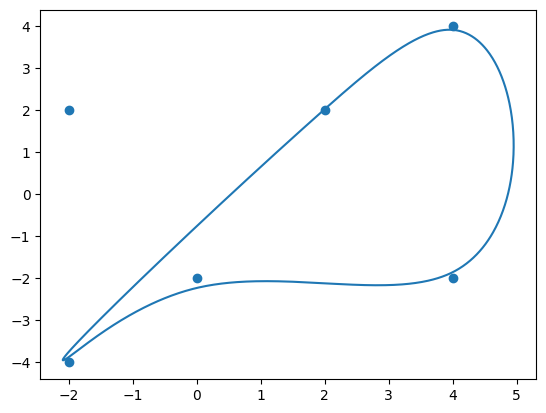

In [32]:
import matplotlib.pyplot as plt
from scipy.interpolate import splprep, splev
import numpy as np
wp = np.array([
    [2,2],
    [4,4],
    [4,-2],
    [0,-2],
    [-2, -4], 
    [-2,2],
    [-2,2],
])

plt.scatter(wp.T[0],wp.T[1])

tck, u = splprep(wp.T, s=.1, per=True) ### CAMBIARE PER=False PER SKIDPAD MAP
u = np.linspace(0, 1, 1_000)[:-1] #int(tot_dist*10)
new_points = splev(u, tck)
new_points_array = np.array( new_points ).T
plt.plot(new_points_array[:,0], new_points_array[:,1])

plt.show()